<a href="https://colab.research.google.com/github/AugustvonMackensen/AI_colab/blob/main/deeplearning_1_perceptron_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] Load needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

[2] Define Prepare_Data Function

In [2]:
def prepare_data(target):
  iris = load_iris() # Read Iris dataset
  X_tr = iris.data[:, 2:] # Pick the length and width for the bloom
  labels = iris.target_names # 'setosa', 'versicolor', 'virginica'
  y = iris.target

  # Label the samples - If targeted, then 1 else 0
  y_tr = []
  for i in range(150):
    y_tr.append(labels[y[i]] == target)
  y_tr = np.array(y_tr, dtype=int)
  return X_tr, y_tr, ['(1) ' + target, '(0) the others']

[3] Activation : Step

In [3]:
def step(x):
  return int(x >= 0)

[4] Define Perception Class

In [4]:
class Perceptron():
  def __init__(self, dim, activation):
    rnd = np.random.default_rng()
    self.dim = dim
    self.activation = activation

    # initialize weight and bias by He Normal Method
    self.w = rnd.normal(scale=np.sqrt(2.0/dim), size = dim)
    self.b = rnd.normal(scale=np.sqrt(2.0/dim))

  def printW(self):
    for i in range(self.dim):
      print(' w{} = {:6.3f}'.format(i+1, self.w[i]), end='')
    print(' b={:6.3f}'.format(self.b))

  def predict(self, x): # calculate the sample that is stored in numpy array x
    return np.array([self.activation(np.dot(self.w, x[i]) + self.b) for i in range(len(x))])

  def fit(self, X, y, N, epochs, eta=0.01):
    # Swap the index of samples randomly
    idx = list(range(N))
    np.random.shuffle(idx)
    X = np.array([X[idx[i]] for i in range(N)])
    y = np.array([y[idx[i]] for i in range(N)])

    f = 'Epochs = {:4d} Loss = {:8.5f}'
    print('Inital value of w : ', end='')
    self.printW()
    for j in range(epochs):
      for i in range(N):
        # Calculate error for the output in terms of x[i]
        delta = self.predict([X[i]])[0] - y[i]
        self.w -= eta * delta * X[i]
        self.b -= eta * delta
      # print learning process
      if j < 10 or (j+1) % 100 == 0:
        loss = self.predict(X) - y
        loss = (loss * loss).sum() / N
        print(f.format(j+1, loss), end='')
        self.printW()

[5] Visualize the model

In [5]:
def visualize(net, X, y, multi_class, labels, class_id, colors,
             xlabel, ylabel, legend_loc='lower right'):
  # list the range between min and max, the gap is 0.05
  x_max = np.ceil(np.max(X[:, 0])).astype(int)
  x_min = np.floor(np.min(X[:, 0])).astype(int)
  y_max = np.ceil(np.max(X[:, 1])).astype(int)
  y_min = np.floor(np.min(X[:, 1])).astype(int)
  x_lin = np.linspace(x_min, x_max, (x_max-x_min)*20+1)
  y_lin = np.linspace(y_min, y_max, (y_max-y_min)*20+1)

  # find x and y from the x_lin and y_Lin
  x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)

  # input
  X_test = np.column_stack([x_mesh.ravel(), y_mesh.ravel()])

  # calculate output in terms of X_test
  if multi_class:
    y_hat = net.predict(X_test)
    y_hat = np.array([np.argmax(y_hat[k]) for k in range(len(y_hat))], dtype=int)
  else:
    y_hat = (net.predict(X_test) >= 0.5).astype(int)
    y_hat = y_hat.reshape(len(y_hat))

  # Set the legend and color for each classes and horizontial and vertical range
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  # draw the Scatter Plot
  for c, i, c_name in zip(colors, labels, class_id):
    # Scatter Plot for grid coodrinate
    plt.scatter(X_test[y_hat == i, 0], X_test[y_hat == i, 1],
                c=c, s=5, alpha=0.3, edgecolors='none')
    # Scatter Plot for learning samples
    plt.scatter(X[y==i, 0], X[y==i, 1],
                c=c, s=20, label=c_name)

  # set the position for legend
  plt.legend(loc=legend_loc)
  # print graph after setting label for x-axis and y-axis
  plt.xlabel(xlabel, size=12)
  plt.ylabel(ylabel, size=12)
  plt.show()

[6] Prepare for training data

In [6]:
nSamples = 150
nDim = 2
target = 'setosa' # set the bloom
X_tr, y_tr, labels = prepare_data(target)

[7] Generate Perceptron Class and Learning

In [7]:
p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, nSamples, epochs=1000, eta=0.01)

Inital value of w :  w1 = -0.917 w2 = -0.300 b= 0.419
Epochs =    1 Loss =  0.03333 w1 = -0.406 w2 = -0.210 b= 0.759
Epochs =    2 Loss =  0.00667 w1 = -0.370 w2 = -0.201 b= 0.779
Epochs =    3 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    4 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    5 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    6 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    7 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    8 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =    9 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =   10 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =  100 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =  200 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =  300 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =  400 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
Epochs =  500 Loss =  0.00000 w1 = -0.351 w2 = -0.197 b= 0.789
E

[8] Visualize

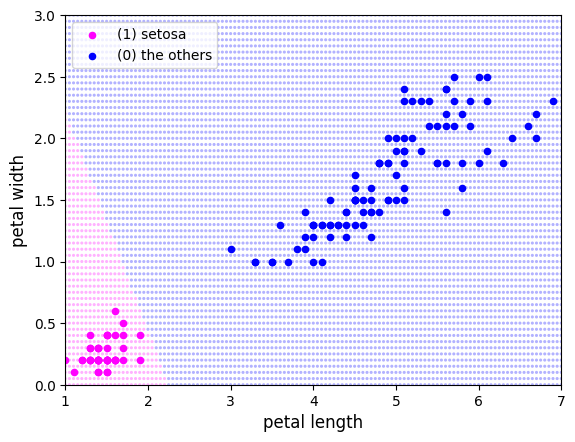

In [8]:
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Analysis :
Setosa can be classified correctly due to linear border
And the border is many so it has the error for normalization.

Case : Classify 'virginica'

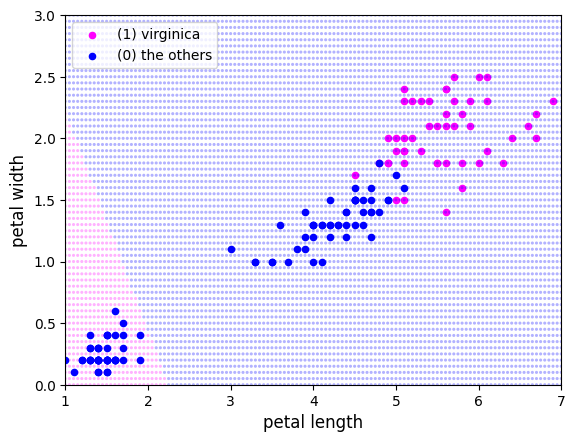

In [9]:
nSamples = 150
nDim = 2
target = 'virginica' # set the bloom
X_tr, y_tr, labels = prepare_data(target)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Analysis :
No linear border because distribution is mixed
Linear Border contains the error

Case : Classify 'versicolor'

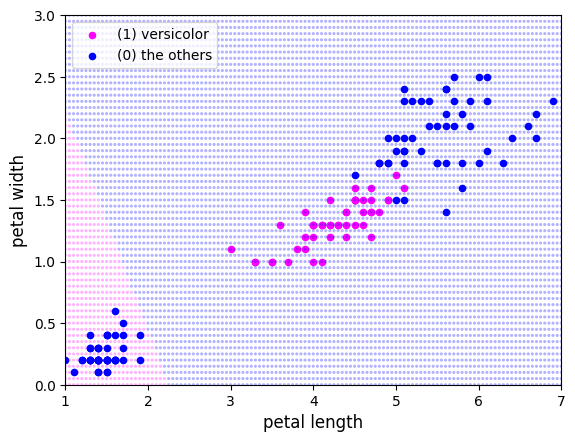

In [10]:
nSamples = 150
nDim = 2
target = 'versicolor' # set the bloom
X_tr, y_tr, labels = prepare_data(target)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

It cannot be discerned by a linear border and the learning result generate meaningless border. It is the limitation of the Single Layer Perceptron.

To solve this, You must use Multiple Layer Perceptron(MLP)

Test 1 :

In [11]:
def prepare_data2(N):
  # N : the number of learning sample
  # The mean coodrinate of class 0 : (1, 2)
  # The mean coodrinate of class 1 : (2, 1)
  C = np.array([[1,2], [2,1]])
  X = []
  y = []
  rnd = np.random.default_rng()

  '''
  Generate learning sample set by adding random value
  to the mean coodrinate of each class
  '''

  for i in range(N):
    j = rnd.integers(0, 2)
    x = np.array(rnd.normal(loc=0.0, scale=0.2, size=2)) + C[j]
    X.append(x)
    y.append(j)
  return np.array(X), np.array(y), ['0', '1']

Inital value of w :  w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    1 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    2 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    3 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    4 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    5 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    6 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    7 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    8 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =    9 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =   10 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =  100 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =  200 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =  300 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =  400 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
Epochs =  500 Loss =  0.00000 w1 =  1.861 w2 = -2.287 b= 0.435
E

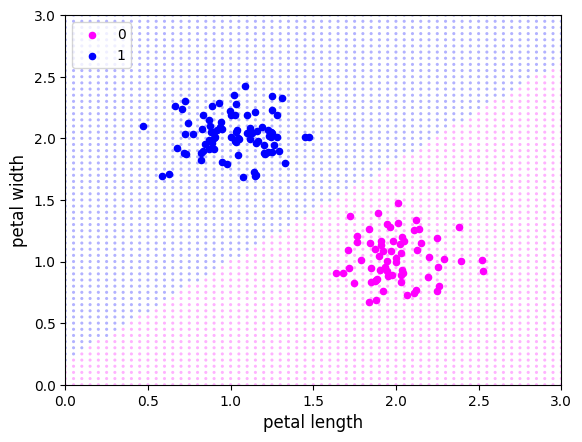

In [12]:
N = 150
nDim = 2
X_tr, y_tr, labels = prepare_data2(N)

p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, N, epochs=1000, eta=0.01)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Analyis:
  It has a linear border

Test 2:

In [13]:
def prepare_data3(N):
  # N : the number of learning sample
  # The mean coodrinate of class 0 : (1, 2), (2, 1)
  # The mean coodrinate of class 1 : (1, 1), (2, 2)
  C = np.array([[1,2], [2,1], [1,1], [2,2]])
  X = []
  y = []
  rnd = np.random.default_rng()

  '''
  Generate learning sample set by adding random value
  to the mean coodrinate of each class
  '''

  for i in range(N):
    j = rnd.integers(0, 4)
    x = np.array(rnd.normal(loc=0.0, scale=0.2, size=2)) + C[j]
    X.append(x)
    y.append(j // 2)
  return np.array(X), np.array(y), ['0', '1']

Inital value of w :  w1 =  0.561 w2 =  0.425 b= 0.561
Epochs =    1 Loss =  0.49333 w1 = -0.029 w2 = -0.086 b= 0.171
Epochs =    2 Loss =  0.20000 w1 = -0.040 w2 = -0.060 b= 0.111
Epochs =    3 Loss =  0.37333 w1 = -0.024 w2 = -0.044 b= 0.061
Epochs =    4 Loss =  0.43333 w1 = -0.024 w2 = -0.019 b= 0.021
Epochs =    5 Loss =  0.43333 w1 = -0.009 w2 = -0.024 b= 0.001
Epochs =    6 Loss =  0.43333 w1 = -0.018 w2 = -0.011 b= 0.001
Epochs =    7 Loss =  0.43333 w1 = -0.018 w2 = -0.013 b= 0.001
Epochs =    8 Loss =  0.43333 w1 = -0.008 w2 = -0.016 b= 0.001
Epochs =    9 Loss =  0.43333 w1 = -0.018 w2 = -0.013 b= 0.001
Epochs =   10 Loss =  0.43333 w1 = -0.008 w2 = -0.015 b= 0.001
Epochs =  100 Loss =  0.43333 w1 = -0.009 w2 = -0.014 b= 0.001
Epochs =  200 Loss =  0.43333 w1 = -0.017 w2 = -0.013 b= 0.001
Epochs =  300 Loss =  0.43333 w1 = -0.019 w2 = -0.020 b= 0.001
Epochs =  400 Loss =  0.43333 w1 = -0.009 w2 = -0.023 b=-0.009
Epochs =  500 Loss =  0.43333 w1 = -0.016 w2 = -0.014 b= 0.001
E

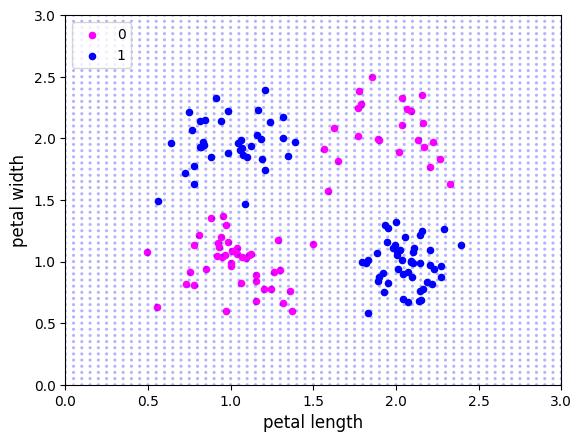

In [14]:
N = 150
nDim = 2
X_tr, y_tr, labels = prepare_data3(N)

p = Perceptron(nDim, activation=step)
p.fit(X_tr, y_tr, N, epochs=1000, eta=0.01)
visualize(p, X_tr, y_tr, multi_class=False,
          class_id=labels, labels=[1, 0], colors=['magenta', 'blue'],
          xlabel='petal length', ylabel='petal width', legend_loc='upper left')

Analysis : No linear border
And The Distribution cannot be discerned by a linear border.